In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [7]:
train = pd.read_csv('titanic_train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#SibSp = Siblins/spouse aboard
# Patch = Parents/childern aboard
#Embarked is the port where they embarked
    # cherbourgh
    # Queenstown
    # South Hampton

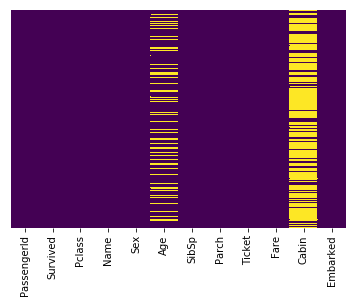

In [12]:
# check out where there is missing data
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# Okay so we are really just missing the age and cabin info
# this is a shame shice I bet there are patterns between cabins and chance of survival 
     # ship design 

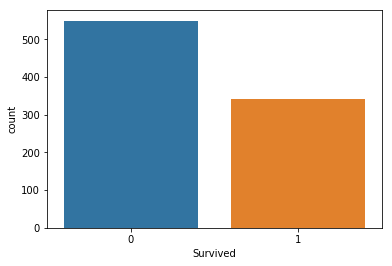

In [13]:
# Profile Survivors
sns.countplot(x = 'Survived', data = train)
# 0 = did not survive
# 1 = survived

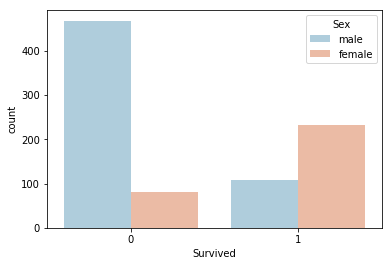

In [23]:
# By Sex
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r') # palette makes it easier to read
# 0 = did not survive
# 1 = survived

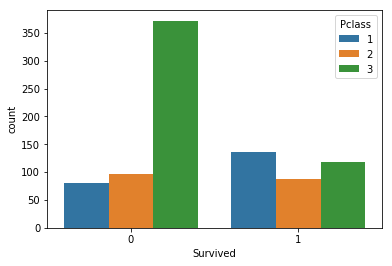

In [26]:
# By Class
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
# 0 = did not survive
# 1 = survived

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


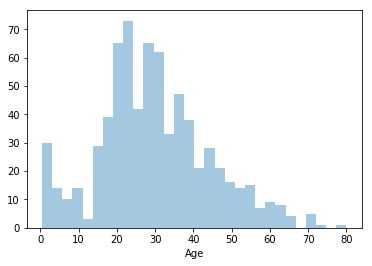

In [30]:
# By Age
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)
# .dropna() drop the emplty values we identified earlier
# .kde ignore density curve 

In [31]:
train.info() # see what else we have to work with 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


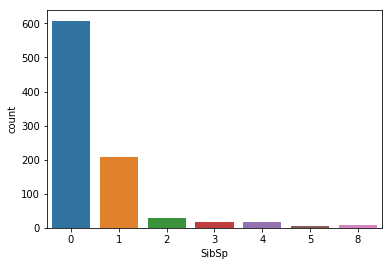

In [32]:
sns.countplot(x = 'SibSp', data = train)
# 0 = no childern or spouse

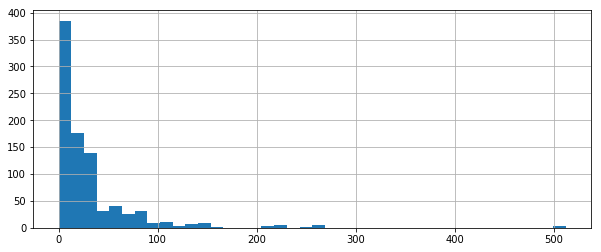

In [35]:
# look at price
train['Fare'].hist(bins = 40, figsize = (10,4)) 
# someone paid $500 in 1900's 

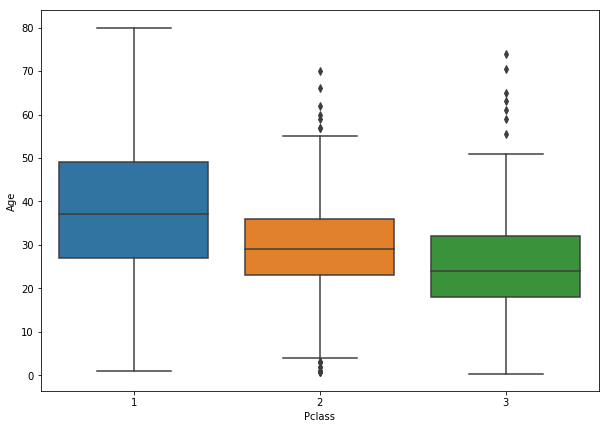

In [44]:
# see what we can do about this missing data
#impute the age valus for the missing age
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
# I expect the ages to vary between classes 
# yup 1st class skews towards a higher age 
# third class shews to a younger age
# third class is porbably young immigrants move to America
# also notice how there is more of spread in the classes 

In [48]:
# impute the missing age by passanger class
def impute_age(cols): # the FUNCTION impute_age takes in ARGUMENT cols
    Age = cols[0] #grabbing off of index values 
    Pclass = cols[1] # we use this off of """"""train[['Age', 'Pclass']].apply"""""" from below
    
    if pd.isnull(Age): # we go through the df by age, once we reach a null check the class
        
        if Pclass == 1: 
            return 37 # eye balling off of boxplot 
        elif Pclass == 2:
            return 29
        else: # otherwise have to be 3rd class
            return 24 
        # this takes care of of any NULL AGE 
    else: # going back 
        return Age # since it is already in df 

In [49]:
#now that we defined the function we can apply it to the df
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1) # axis = 1 to apply across COLUMNS
# by using train[] = we are re-assinging the values in the column

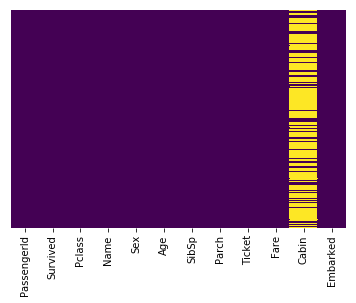

In [50]:
#check heatmap again 
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# BOOM

In [51]:
train.drop('Cabin', axis = 1, inplace = True,) 
# dropping the Cabin column due to missing data
# we could try and do something with class 
# maybe use a link map later on? 

In [52]:
train.head() #check 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


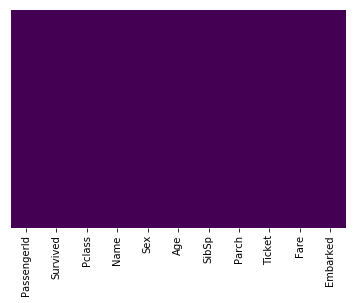

In [53]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [55]:
train.dropna(inplace = True) # we are dropping any other missing data 
# this will give us a clean usable df

In [57]:
# transfrom catagorical varieables into dummy variables 
sex = pd.get_dummies(train['Sex'], drop_first = True) 
# dropfirst keeps pd from splitting into 2 columns
    # two columns will be a 0 and 1
        # this will lead to multi-colinearity where one is a perfect predictor of the other
        

In [58]:
sex.head() 
# male = 1
# female = 0

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [62]:
embark.head() # remeber that you have n - 1 boolean values
# 0,1
# algorithm will look or a 1 or 2 else it knows it is last option

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [65]:
# add to train
train = pd.concat([train,sex,embark], axis = 1)
# [] using dfs
# axis = 1 we are adding new columns


In [66]:
train.head()
# look at Q and S
   # did they embark in Q, 0 = NO move
        # did they embark on S 0 = NO move
            # they must have embared on C

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
# passengerid is an index 
train.drop('PassengerId', axis = 1, inplace = True)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [84]:
# now we are going to seperate our train and test data
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [96]:
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [97]:
from sklearn.cross_validation import train_test_split 
#use sklearn spliting method

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [99]:
#logistic model
from sklearn.linear_model import LogisticRegression # capitilization is important

In [103]:
logmodel = LogisticRegression() #define object 

In [104]:
logmodel.fit(X_train, y_train)
# prints the default parameters

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
predictions = logmodel.predict(X_test)

In [106]:
predictions
# prediction of survival
# 0 = dead
# 1 = survive

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [107]:
from sklearn.metrics import classification_report
# this will give us a breakdown of precision

In [109]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
print(confusion_matrix(y_test, predictions))
# remeber we are dealing with a smaller set of data since we splt the train data 

[[148  15]
 [ 36  68]]
